## Results

No of records : 12102   
Ship Type : Bulk Carrier    
Training Accuracy : 0.9478            
Testing Accuracy: 0.9405 

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

In [4]:
df_train = pd.read_excel('Data_2024/ShipType1.xlsx')
df_test = pd.read_excel('Data_2025/ShipType1.xlsx')

pd.set_option('display.max_columns', None)
df_train.columns = df_train.columns.str.replace(' ', '_')
df_train = df_train.fillna(0)
df_train = df_train.loc[:, ~df_train.columns.duplicated()]

df_test.columns = df_test.columns.str.replace(' ', '_')
df_test = df_test.fillna(0)
df_test = df_test.loc[:, ~df_test.columns.duplicated()]

In [5]:
df_train = df_train.select_dtypes(include=['float64', 'int64'])

corr = df_train.corr()['TOTALCO2EMISSION'].sort_values(ascending=False)
corr.head(30)

TOTALCO2EMISSION        1.000000
Distance                0.938843
ME_RunningHour          0.839500
AVGSPEED                0.767242
FCPH                    0.747777
CII_REFERENCE           0.609599
REQUIRED_CII            0.609549
FCPD_YTD                0.586424
swell_height            0.586267
ME_HFO                  0.524335
wave_height             0.486218
wind_bft                0.420196
AE_HFO                  0.389701
FCPD                    0.245827
AE_Boiler_HFO           0.231353
Incienrator_MDO         0.223992
wave_dir                0.147533
ME_LFO                  0.135037
ME_MDO                  0.119679
wind_dir                0.107206
AE_LFO                  0.093832
FCPH_YTD                0.093526
AVGSPEED_YTD            0.084918
ROB_HFO                 0.073472
ISUKMRV_VERIFICATION    0.072585
draft_fwd               0.071074
FLAGSTATE               0.062728
GrossTonnage            0.055900
Displacement            0.055188
draft_mid               0.051028
Name: TOTA

In [7]:
df_train.rename(columns={'Distance': 'Distance',
                   'ME_RunningHour': 'SteamingTime',
                   'DeadWeight': 'Deadweight',
                   'GrossTonnage': 'GrossTonnage',
                   'ME_MDO/MGO': 'ME_MDO/MGO',
                   'ME_HFO': 'ME_HFO',
                   'ME_LFO': 'ME_LFO',
                   'AE_Boiler_MDO/MGO':'AE_Boiler_MDO/MGO',
                   'AE_Boiler_HFO':'AE_Boiler_HFO',
                   'AE_Boiler_LFO':'AE_Boiler_LFO'}, inplace=True)

X_train = df_train[['Deadweight', 'GrossTonnage',
        'Distance', 'SteamingTime',
        'ME_MDO/MGO', 'ME_HFO',
        'ME_LFO', 'AE_Boiler_MDO/MGO',
        'AE_Boiler_HFO', 'AE_Boiler_LFO']]


y_train = df_train['TOTALCO2EMISSION']

In [8]:
df_test.rename(columns={'Distance': 'Distance',
                   'ME_RunningHour': 'SteamingTime',
                   'DeadWeight': 'Deadweight',
                   'GrossTonnage': 'GrossTonnage',
                   'ME_MDO/MGO': 'ME_MDO/MGO',
                   'ME_HFO': 'ME_HFO',
                   'ME_LFO': 'ME_LFO',
                   'AE_Boiler_MDO/MGO':'AE_Boiler_MDO/MGO',
                   'AE_Boiler_HFO':'AE_Boiler_HFO',
                   'AE_Boiler_LFO':'AE_Boiler_LFO'}, inplace=True)

X_test = df_test[['Deadweight', 'GrossTonnage',
        'Distance', 'SteamingTime',
        'ME_MDO/MGO', 'ME_HFO',
        'ME_LFO', 'AE_Boiler_MDO/MGO',
        'AE_Boiler_HFO', 'AE_Boiler_LFO']]


y_test = df_test['TOTALCO2EMISSION']

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Training set size:", X_train.shape, y_train.shape)
print("Test set size:", X_test.shape, y_test.shape)

Training set size: (9681, 10) (9681,)
Test set size: (2421, 10) (2421,)


In [9]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.svm import LinearSVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor 
from sklearn.ensemble import AdaBoostRegressor 
from sklearn.ensemble import GradientBoostingRegressor 
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_squared_error

In [10]:
models = [
    ('LR', LinearRegression()),
    ('Ridge', Ridge()),
    ('Lasso', Lasso()),
    ('L_SVR', LinearSVR()),
    ('DT', DecisionTreeRegressor()),
    ('ADA', AdaBoostRegressor()),
    ('RF', RandomForestRegressor()),
    ('GB', GradientBoostingRegressor()),
    ('XGB', XGBRegressor())
]

results = []

# Train and evaluate each model
for name, model in models:
    model.fit(X_train, y_train)
    
    # Predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Compute R² scores
    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)

    # Compute MSE
    train_mse = mean_squared_error(y_train, y_train_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)

    # Compute RMSE
    train_rmse = np.sqrt(train_mse)
    test_rmse = np.sqrt(test_mse)

    # Append results as a new row
    results.append([name, train_r2, test_r2, train_mse, train_rmse, test_mse, test_rmse])

# Create DataFrame for better visualization
results_df = pd.DataFrame(results, columns=['Model', 'Train R² Score', 'Test R² Score', 'Train MSE', 'Train RMSE', 'Test MSE', 'Test RMSE'])

# Print the results
print(results_df)

C:\Users\Abhedaya\CO2Prediction\env\lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


   Model  Train R² Score  Test R² Score  Train MSE  Train RMSE   Test MSE  \
0     LR        0.893099       0.917013  58.950984    7.677954  45.299512   
1  Ridge        0.893099       0.917014  58.951009    7.677956  45.299249   
2  Lasso        0.885424       0.910678  63.183586    7.948810  48.757838   
3  L_SVR        0.882891       0.909833  64.580015    8.036169  49.218650   
4     DT        0.982098       0.884108   9.872293    3.142021  63.260979   
5    ADA        0.857287       0.851813  78.699811    8.871291  80.889968   
6     RF        0.974189       0.935778  14.233723    3.772761  35.056366   
7     GB        0.923602       0.938611  42.130187    6.490777  33.510212   
8    XGB        0.962600       0.932915  20.624233    4.541391  36.619341   

   Test RMSE  
0   6.730491  
1   6.730472  
2   6.982681  
3   7.015600  
4   7.953677  
5   8.993885  
6   5.920842  
7   5.788801  
8   6.051392  


In [11]:
import optuna

def objective(trial):
    params = {
        "n_estimators": trial.suggest_int("n_estimators", 50, 500),
        "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.3),
        "max_depth": trial.suggest_int("max_depth", 3, 10),
        "min_samples_split": trial.suggest_int("min_samples_split", 2, 10),
        "min_samples_leaf": trial.suggest_int("min_samples_leaf", 1, 10),
        "subsample": trial.suggest_float("subsample", 0.5, 1.0),
    }

    # Train Gradient Boosting model
    model = GradientBoostingRegressor(**params)
    model.fit(X_train, y_train)

    # Predict and evaluate
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    
    return r2  # Maximizing R² score

# Run Optuna optimization
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=50)  # Run for 50 trials

# Print best parameters
print("Best Parameters:", study.best_params)

[I 2025-04-16 14:22:23,186] A new study created in memory with name: no-name-86ba0b64-d59f-48f1-8f7e-80b229732091
[I 2025-04-16 14:22:25,882] Trial 0 finished with value: 0.9212994694689431 and parameters: {'n_estimators': 123, 'learning_rate': 0.24859970633941975, 'max_depth': 9, 'min_samples_split': 3, 'min_samples_leaf': 9, 'subsample': 0.776013926890885}. Best is trial 0 with value: 0.9212994694689431.
[I 2025-04-16 14:22:29,226] Trial 1 finished with value: 0.933221712612847 and parameters: {'n_estimators': 178, 'learning_rate': 0.10553264501178343, 'max_depth': 7, 'min_samples_split': 7, 'min_samples_leaf': 5, 'subsample': 0.8627315875066042}. Best is trial 1 with value: 0.933221712612847.
[I 2025-04-16 14:22:31,802] Trial 2 finished with value: 0.9307118701634064 and parameters: {'n_estimators': 351, 'learning_rate': 0.01341679343174438, 'max_depth': 3, 'min_samples_split': 4, 'min_samples_leaf': 10, 'subsample': 0.5777663584273605}. Best is trial 1 with value: 0.933221712612847

Best Parameters: {'n_estimators': 60, 'learning_rate': 0.08292430317892222, 'max_depth': 7, 'min_samples_split': 9, 'min_samples_leaf': 1, 'subsample': 0.7170434545013877}


In [13]:
gbr = GradientBoostingRegressor(
    n_estimators=60,
    learning_rate=0.08292430317892222,
    max_depth=7,
    min_samples_split=9,
    min_samples_leaf=1,
    subsample=0.7170434545013877
)

gbr.fit(X_train, y_train)

GradientBoostingRegressor(learning_rate=0.08292430317892222, max_depth=7,
                          min_samples_split=9, n_estimators=60,
                          subsample=0.7170434545013877)

In [14]:
y_train_predict = gbr.predict(X_train)
y_test_predict = gbr.predict(X_test)

training_r2 = r2_score(y_train, y_train_predict)
testing_r2 = r2_score(y_test, y_test_predict)

training_mse = mean_squared_error(y_train, y_train_predict)
testing_mse = mean_squared_error(y_test, y_test_predict)

training_rmse = np.sqrt(training_mse)
testing_rmse = np.sqrt(testing_mse)

print(f"Train R² Score: {training_r2:.4f}")
print(f"Test R² Score: {testing_r2:.4f}")
print(f"Train MSE: {training_mse:.4f}")
print(f"Test MSE: {testing_mse:.4f}")
print(f"Train RMSE: {training_rmse:.4f}")
print(f"Test RMSE: {testing_rmse:.4f}")

Train R² Score: 0.9478
Test R² Score: 0.9405
Train MSE: 28.7859
Test MSE: 32.4780
Train RMSE: 5.3653
Test RMSE: 5.6989


In [12]:
X.iloc[1580:1585]

,Deadweight,GrossTonnage,Distance,SteamingTime,ME_MDO/MGO,ME_HFO,ME_LFO,AE_Boiler_MDO/MGO,AE_Boiler_HFO,AE_Boiler_LFO
1580,34328,22939,232.2,24.0,0,1,0,0,1,0
1581,34328,22939,250.4,25.0,0,1,0,0,1,0
1582,34328,22939,241.6,24.0,0,1,0,0,1,0
1583,34328,22939,239.7,24.0,0,1,0,0,1,0
1584,34328,22939,261.1,24.5,0,1,0,0,1,0


In [13]:
y.iloc[1580:1585]

1580    50.14
1581    52.95
1582    50.77
1583    48.28
1584    48.59
Name: TOTALCO2EMISSION, dtype: float64

In [14]:
single_test_case = pd.DataFrame({
    "Deadweight":[34328],
    'GrossTonnage':[22939],
    'Distance':[232.2],     
    'SteamingTime':[24],
    'ME_MDO/MGO':[0],
    'ME_HFO':[1],
    'ME_LFO':[0],
    'AE_Boiler_MDO/MGO':[0],
    'AE_Boiler_HFO':[1],
    'AE_Boiler_LFO':[0]
})

single_prediction = gbr.predict(single_test_case)
print(f"Predicted Value: {single_prediction[0]}")

Predicted Value: 53.03343500910431


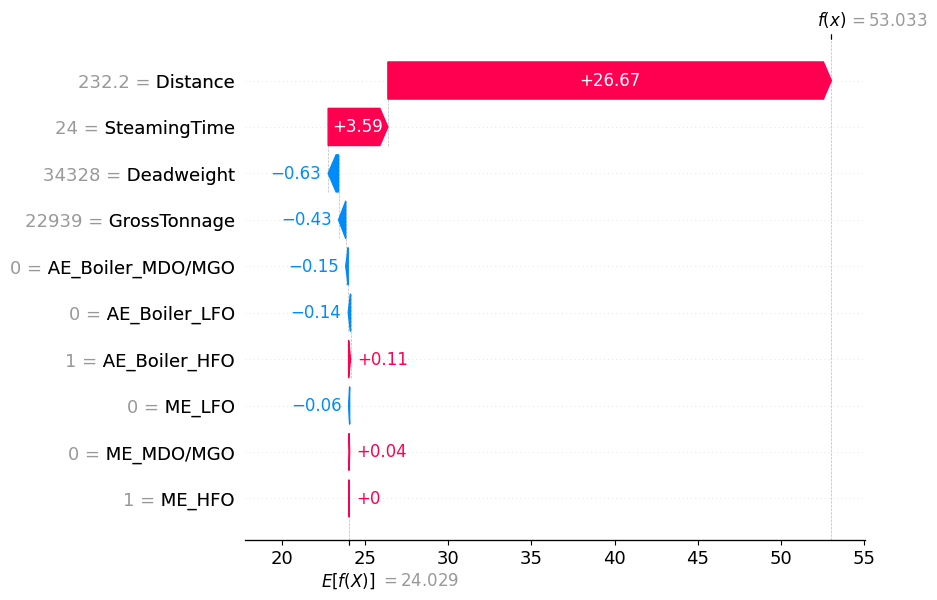

In [15]:
import shap
# on the command prompt install shap using command "pip install shap"

explainer = shap.Explainer(gbr)
shap_values = explainer(single_test_case)
shap.plots.waterfall(shap_values[0])

In [15]:
import joblib

joblib.dump(gbr, 'Models/ship_model_1.joblib')

['Models/ship_model_1.joblib']

In [2]:
import joblib
import pandas as pd

model = joblib.load("Models/ship_model_1.joblib")
features = [
    "Deadweight", "GrossTonnage", "Distance", "SteamingTime",
    "ME_MDO/MGO", "ME_HFO", "ME_LFO",
    "AE_Boiler_MDO/MGO", "AE_Boiler_HFO", "AE_Boiler_LFO"
]

test_data = pd.DataFrame([[
    30439, 19972, 279, 24,
    0, 1, 0,
    1, 1, 0
]], columns=features)

# Predict
prediction = model.predict(test_data)[0]
print(f"Predicted CO2 Emissions: {prediction}")

Predicted CO2 Emissions: 52.79239260808536
